# Project: Data Visualization 


## Author: Robert HROMADA (SVK)

### Table of Contents
  
<ul>
<li><a href="#Intro">Introduction - ProsperLoan Data Analysis</a></li>
<li><a href="#Gathering Data">Part I - Gathering Data</a></li>
<li><a href="#Assessing Data">Part II - Assessing Data</a></li>
<li><a href="#Cleaning Data">Part III - Cleaning Data</a></li>

<li><a href="#Visualization">Part IV - Data Visualization</a></li>
    <li><a href="#Univariate Exploration">Part IV-A - Univariate Exploration</a></li>
    <li><a href="#Univariate Exploration Summary">Part IV-B Univariate Exploration Summary</a></li>
    <li><a href="#Bivariate Exploration">Part IV-C - Bivariate Exploration</a></li>
    <li><a href="#Bivariate Exploration Summary">Part IV-D - Bivariate Exploration Summary</a></li>
<li><a href="#Resources">Resources</a></li>
</ul>



<a id='Intro'></a>
## Introduction

### ProsperLoan Data Analysis

This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, we are using the data from the Posper to analyse it and trying to find the pattern in the Prosper data.

Whole dataset contains 

In [1]:
import numpy as np
import os
import pandas as pd

pd.set_option('display.max_colwidth', 400)

import matplotlib.pyplot as plt                                      
%matplotlib inline

from matplotlib import cm as cm

import seaborn as sns

<a id='Gathering Data'></a>
## Part I - Gathering Data

In [2]:
#read prosperLoanData.csv file
df = pd.read_csv('prosperLoanData.csv', encoding='utf-8')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


<a id='Assessing Data'></a>
## Part II - Assessing Data

In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Dataset contains 81 diffrent variables and 113937 rows with values of these variables in Prosper Loan Data.

In the dataset there are missing values.

A lot of variables seem to be administrative ID's (e.g. ListingKey and ListingNumber), and we can detete them.
They are not usfull for us in this project.

There are 17 variables of type object. Those will probably need some attention before further steps.

CreditScoreRangeLower and CreditScoreRangeUpper values can be converted into a single CreditScore value (calculate average of the two variables).

LoanOriginalDate should in date format.

LoanOriginalQuarter can be split into two columns.

Columns ProsperRating (numeric), ProsperRating (Alpha) and ListingCategory (numeric) have strange name. It should be rename.

Column ListingCategory(numecal) is Float64 type. For easier work with categorical data we can tranfer it into string value.

#### Columns description
For more detail check https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000

In our analysis we will focus on facts which have impact on borrowers reguest for loan from Prosper Loan.

Due to fact that Prosper Loan bussiness area is Loan Providing, we can expect that they need to be sure that borrower will be able to:
* pay regulary for its loan,
* has appropriate income for apropriate loan high.



<a id='Cleaning Data'></a>
## Part III - Cleaning Data

Main effort in this project put on "Communicate Data Findings".

As a result of this only basic cleaning of the dataset was made.

In [5]:
df.sample(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
60899,DBC535991713065600D863A,1116090,2014-01-06 05:11:23.997000000,NaN,36,Current,NaN,0.28595,0.2474,0.2374,...,-8.49,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
71773,C36A3601174407332AA965C,1157079,2014-01-23 07:32:53.740000000,NaN,36,Current,NaN,0.11563,0.0879,0.0779,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
74826,C83F35349377557385B6877,545913,2011-12-21 05:47:45.647000000,NaN,36,Chargedoff,2013-11-22 00:00:00,0.35285,0.3127,0.3027,...,-50.06,0.0,2458.03,2458.03,0.0,1.0,0,0,0.0,1


In [6]:
# using apply function to create a new column 
df['CreditScoreRange'] = df.apply(lambda row: (row.CreditScoreRangeUpper + row.CreditScoreRangeLower)/2,
                                                  axis = 1) 

In [7]:
# Adding two new columns to the existing dataframe. 
# splitting is done on LoanOriginationQuarter. 

df[['LoanQuarter','LoanYear']] = df.LoanOriginationQuarter.str.split(" ",expand=True) 

In [8]:
# Convert the datatype of LoanOriginationDate
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

In [9]:
#Renaming columns ProsperRating (numeric), ProsperRating (Alpha) and ListingCategory (numeric)
df.rename(columns={'ProsperRating (numeric)': 'ProsperRatingNumeric',
                   'ProsperRating (Alpha)': 'ProsperRatingAlpha',
                   'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [10]:
df.replace(to_replace={"ListingCategory": {0: "Unknown", 1: "Debt_Consolidation", 2: "Home_Improvement", 3: "Business",
                                            4: "Personal_Loan",5: "Student_Use", 6: "Auto", 7: "Other",
                                            8: "Baby", 9: "Boat", 10: "Cosmetic_Procedures", 11: "Engagement_Ring",
                                            12: "Green_Loans", 13: "Household_Expenses", 14: "Large_Purchase",15: "Medical_Dental",
                                            16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation",
                                            20: "Wedding_Loan"}}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 84 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  object        
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [12]:
# Colums which will be ketp for analysis  
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,
        'BorrowerAPR' , 
        'BorrowerRate' ,
        'EstimatedReturn' ,
        'ProsperRatingNumeric',
        'ProsperRatingAlpha',
        'ProsperScore',                     
        'ListingCategory',
        'BorrowerState' ,
        'Occupation', 
        'EmploymentStatus',
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner',
        'DebtToIncomeRatio',
        'IncomeRange',
        'IncomeVerifiable',
        'StatedMonthlyIncome',
        'LoanOriginalAmount',
        'LoanOriginationDate',
        'MonthlyLoanPayment',      
        'PercentFunded',
        'Recommendations',
        'Investors',
        'CreditScoreRange',
        'LoanQuarter',
        'LoanYear']

In [13]:
working_df = df[cols]

In [14]:
working_df.sample(3)

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,...,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors,CreditScoreRange,LoanQuarter,LoanYear
112605,36,Completed,NaN,0.08684,0.0800,NaN,NaN,NaN,NaN,Unknown,...,7500.000000,5000,2007-12-10,156.68,1.0,0,163,849.5,Q4,2007
78973,36,Current,0.14008,0.19501,0.1585,0.08268,5.0,B,7.0,Debt_Consolidation,...,4583.333333,15000,2013-10-10,526.25,1.0,0,1,689.5,Q4,2013
52163,36,Current,0.25006,0.32488,0.2850,0.10256,2.0,E,3.0,Debt_Consolidation,...,5416.666667,5000,2014-02-20,208.17,1.0,0,1,649.5,Q1,2014


In [15]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      113937 non-null  int64         
 1   LoanStatus                113937 non-null  object        
 2   EstimatedEffectiveYield   84853 non-null   float64       
 3   BorrowerAPR               113912 non-null  float64       
 4   BorrowerRate              113937 non-null  float64       
 5   EstimatedReturn           84853 non-null   float64       
 6   ProsperRatingNumeric      84853 non-null   float64       
 7   ProsperRatingAlpha        84853 non-null   object        
 8   ProsperScore              84853 non-null   float64       
 9   ListingCategory           113937 non-null  object        
 10  BorrowerState             108422 non-null  object        
 11  Occupation                110349 non-null  object        
 12  Em

In [16]:
working_df.isnull().sum()

Term                            0
LoanStatus                      0
EstimatedEffectiveYield     29084
BorrowerAPR                    25
BorrowerRate                    0
EstimatedReturn             29084
ProsperRatingNumeric        29084
ProsperRatingAlpha          29084
ProsperScore                29084
ListingCategory                 0
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
DebtToIncomeRatio            8554
IncomeRange                     0
IncomeVerifiable                0
StatedMonthlyIncome             0
LoanOriginalAmount              0
LoanOriginationDate             0
MonthlyLoanPayment              0
PercentFunded                   0
Recommendations                 0
Investors                       0
CreditScoreRange              591
LoanQuarter                     0
LoanYear                        0
dtype: int64

In [17]:
df.iloc[15]['LoanOriginationDate']

Timestamp('2012-04-19 00:00:00')

In [18]:
df.iloc[15]['ListingCategory']

'Household_Expenses'

<a id='Visualization'></a>
## Part IV - Data Visualization

#### Questions

**How was changed the loaned amount of money changed on yearly basis?**

**What is the most common loan lenght and loan high?**

**What was the reason for loan?**

**What features of borrower will have impact on loan?**
I expect that on loan status will have huge impact the background of the borrower like occupation, income , whether they are with homeown status and prosper rating.

<a id='Univariate Exploration'></a>
### Univariate Exploration

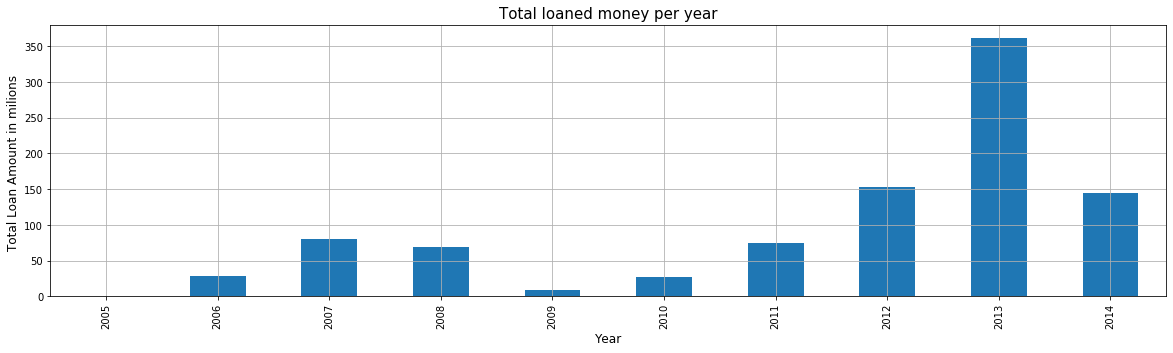

In [19]:
# Total numbers of produced movies over the yerasype

loan_counts = working_df.groupby(['LoanYear']).LoanOriginalAmount.sum()/1000000
plt.rcParams['figure.figsize'] = 20, 5

loan_counts.plot(kind='bar')

# Plot formatting
plt.title('Total loaned money per year', fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Loan Amount in milions ",fontsize=12);

plt.grid();


We can see two maximums one in 2007-2008 and second one in 2013. After these year total amount of loned money felt down. In 2009 it was caused probably due to Global financial crisis 2009 <a href="#[1]">[1]</a>. In 2014 similar situation happend again <a href="#[2]">[2]</a>.

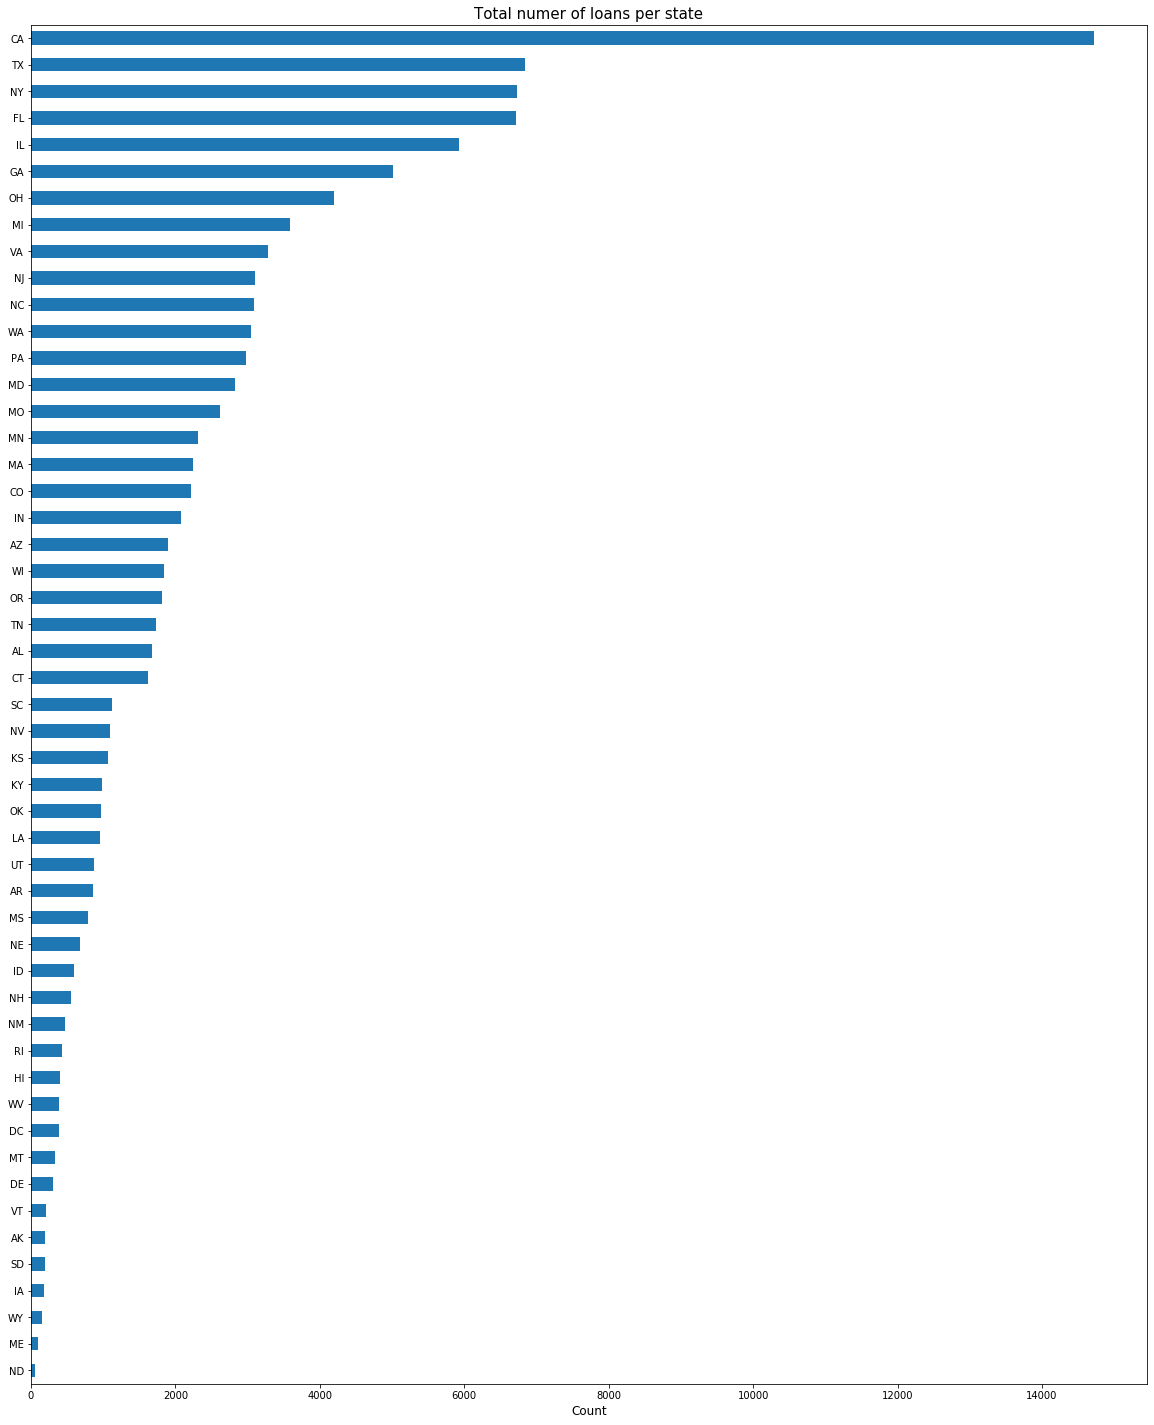

In [20]:
# Loans counts in states
plt.rcParams['figure.figsize'] = 20, 25
working_df['BorrowerState'].value_counts().plot(kind = 'barh')
plt.title('Total numer of loans per state', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.gca().invert_yaxis();


California has the largest number of borrowers. California is TOP probably due to fact that Prosper Loan was founded and is located in California. <a href="#[3]">[3]</a>  The other popular states include Texas,  New York, Florida and Illinois.

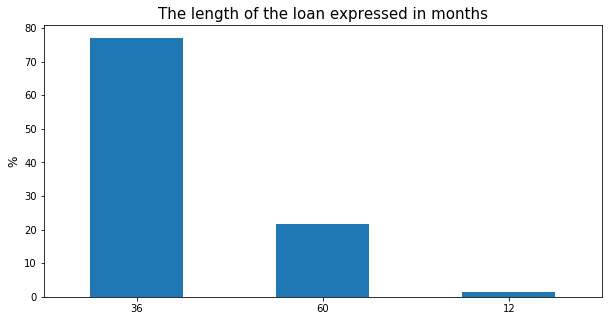

In [21]:
#Loan Lenght
loan_lenght = working_df['Term'].value_counts() /len(working_df['Term'])*100
plt.rcParams['figure.figsize'] = 10, 5
loan_lenght.plot(kind='bar' )

plt.title('The length of the loan expressed in months', fontsize=15)
plt.ylabel("%",fontsize=12);
plt.xticks(rotation = 0);

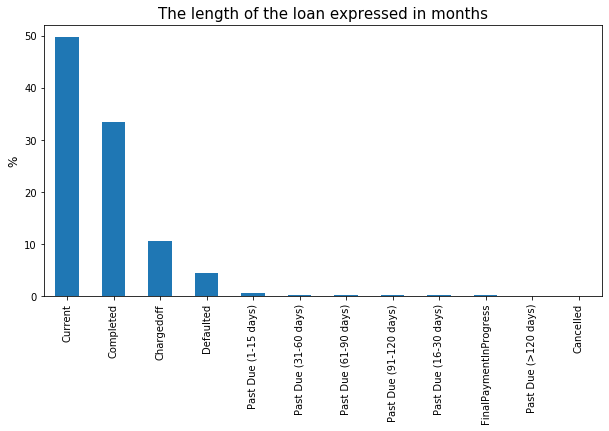

In [22]:
#Loan Lenght
plt.rcParams['figure.figsize'] = 10, 5
loan_lenght = working_df['LoanStatus'].value_counts() /len(working_df['LoanStatus'])*100
loan_lenght.plot(kind='bar' )

plt.title('The length of the loan expressed in months', fontsize=15)
plt.ylabel("%",fontsize=12);
plt.xticks(rotation = 90);


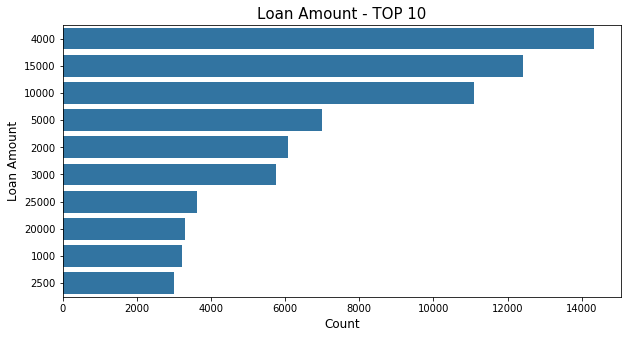

In [23]:
# Most common Loan Amount - TOP 10
base_color = sns.color_palette()[0]

sns.countplot(y="LoanOriginalAmount", data=working_df, color = base_color,
              order=working_df.LoanOriginalAmount.value_counts().iloc[:10].index);
plt.title('Loan Amount - TOP 10', fontsize=15)
plt.ylabel("Loan Amount",fontsize=12)
plt.xlabel("Count",fontsize=12);
plt.xticks(rotation = 0)
base_color = sns.color_palette()[0];

Most Loan Amount is 4000 USD followed by 15000 and 10000 USD. For better overwiev we have to comparer Loan Amount with The length of the loan expressed in months.

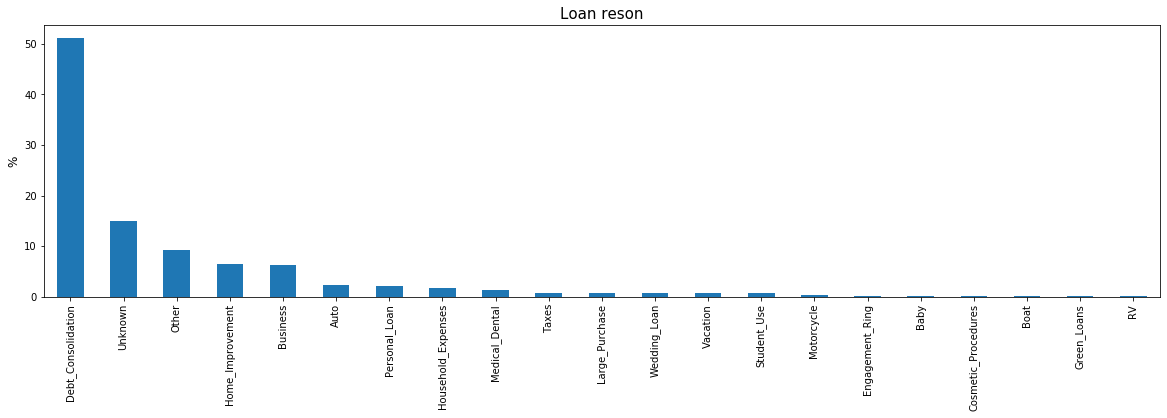

In [24]:
# Loan Reason
loan_reason = working_df['ListingCategory'].value_counts()/len(working_df['ListingCategory'])*100
plt.rcParams['figure.figsize'] = 20, 5
loan_reason.plot(kind='bar' )

plt.title('Loan reson', fontsize=15)

plt.ylabel("%",fontsize=12);



Main reason for loan is Debt Consolodation which seems realy interesting due to fact that borrower take another loan to solve previuos one. The reason in this case can be e.g. better "BorrowerRate".

In top 5 reasons are home improvement, bussines and auto. Reason like "other" is hard to evaluate.

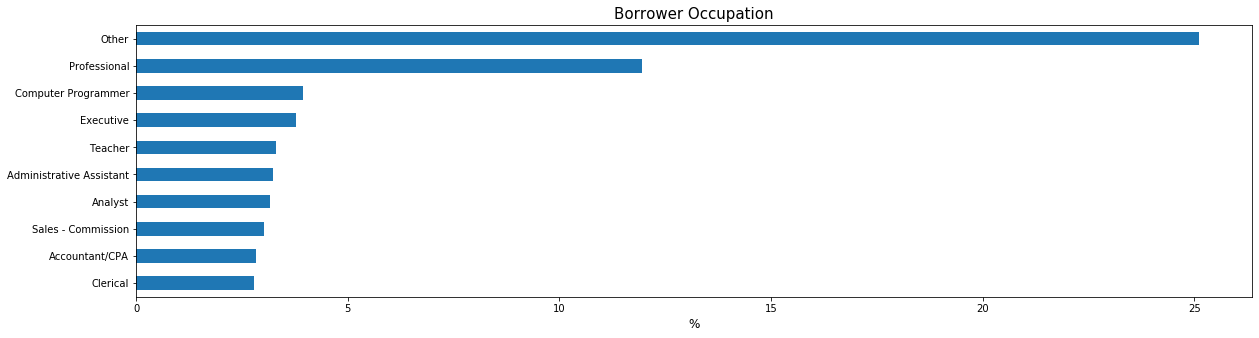

In [25]:
# TOP 10 Borrower Occupation
plt.rcParams['figure.figsize'] = 20, 5
top10_occup = working_df['Occupation'].value_counts()/len(working_df['Occupation'])*100
top10_occup[:10].plot(kind='barh')

plt.title('Borrower Occupation', fontsize=15)
plt.xlabel('%', fontsize=12)

plt.gca().invert_yaxis();


From the plot above we can see that most mentioned occupation in Loan request were ‘Other’ and ‘Professional’. Reason for this could be really simple. Many borrowers probabply decided to choose “other” and “professional” instead of their real occupation.

In [26]:
#Employment Status of borrowers
working_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [27]:
#Prosper Rating Aplha
working_df['ProsperRatingAlpha'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRatingAlpha, dtype: int64

In [28]:
#Borrower Incame range
working_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [29]:
# the order of Occupation, ProsperRatingAplha and IncomeRange can be maintained.

ProsperRatingAlpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',
                       'Not employed', 'Not displayed', '$0']
EmploymentStatus_classes = ['Employed','Full-time', 'Self-employed', 'Part-time', 'Other',
                            'Retired', 'Not employed', 'Not available']

pd_ver = pd.__version__.split(".")

if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRatingAlpha_classes)
    working_df['ProsperRatingAlpha'] = working_df['ProsperRatingAlpha'].astype(vclasses)
    
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    working_df['IncomeRange'] = working_df['IncomeRange'].astype(vclasses_1)
    
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = EmploymentStatus_classes)
    working_df['EmploymentStatus'] = working_df['EmploymentStatus'].astype(vclasses)
else: # compatibility for v.20
    working_df['ProsperRatingAlpha'] = working_df['ProsperRatingAlpha'].astype('category', ordered = True,
                                                     categories = ProsperRatingAlpha_classes)
    
    working_df['IncomeRange'] = working_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)
    
    working_df['EmploymentStatus'] = working_df['EmploymentStatus'].astype('category', ordered = True,
                                                     categories = ProsperRatingAlpha_classes)


C:\Utils\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Utils\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Utils\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

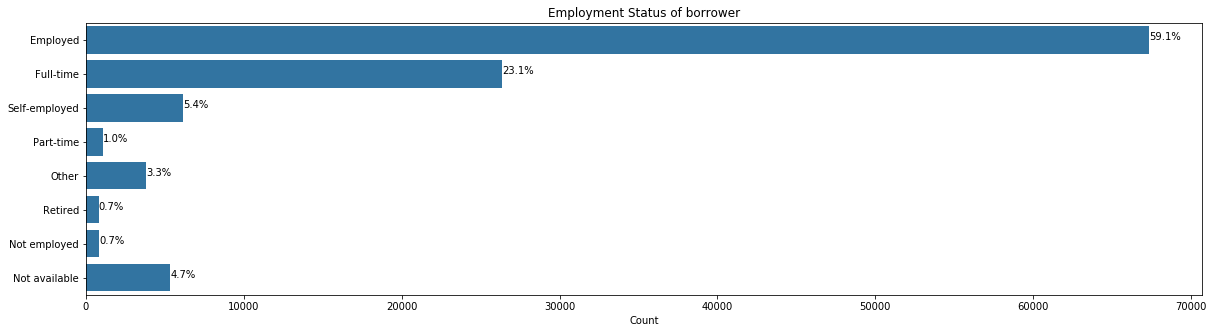

In [30]:
#Employment Status of borrower
ax = sns.countplot(y='EmploymentStatus', data=working_df, color = base_color)
plt.title('Employment Status of borrower')
plt.xlabel('Count')
plt.ylabel('')
base_color = sns.color_palette()[0]

total = len(working_df['EmploymentStatus'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show();

If we count percentige of borrowers who have regular income they are major customer of Proper Loan. Only 0.7% of borrowers are un-employed.

In [31]:
working_df['CreditScoreRange'].describe()

count    113346.000000
mean        695.067731
std          66.458275
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScoreRange, dtype: float64

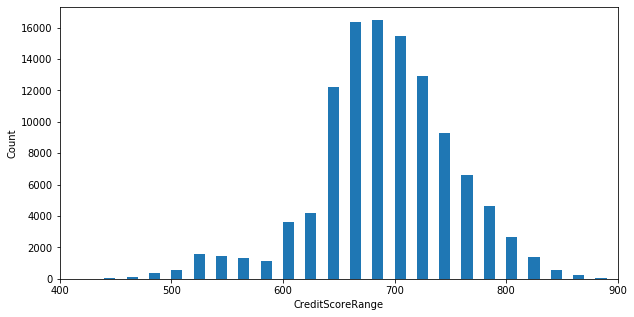

In [32]:
# CreditScoreRange
plt.rcParams['figure.figsize'] = 10, 5
bin_edges = np.arange(0, working_df['CreditScoreRange'].max()+1, 10)
plt.hist(data = working_df, x = 'CreditScoreRange', bins = bin_edges);
plt.xlabel('CreditScoreRange');
plt.ylabel('Count')
plt.xlim(400, 900);


In [33]:
working_df['CreditScoreRange'].describe()

count    113346.000000
mean        695.067731
std          66.458275
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScoreRange, dtype: float64

Credit Score Range provided by a consumer credit rating agency normal distribution with average value 695.

In [34]:
 working_df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [35]:
 working_df['StatedMonthlyIncome'].min(),  working_df['StatedMonthlyIncome'].max()

(0.0, 1750002.916667)

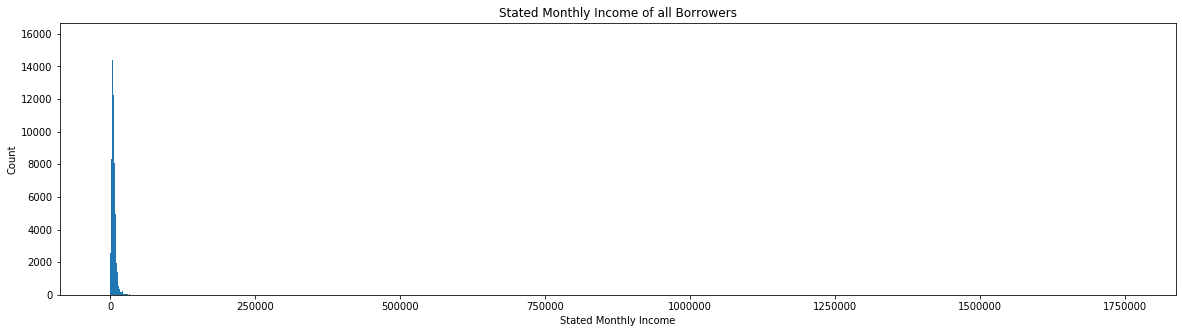

In [36]:
# Borrower Income Distribution
plt.figure(figsize = [20, 5]) 

bin_edges = np.arange(0, working_df['StatedMonthlyIncome'].max()+1000, 800)
plt.hist(data = working_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');
plt.title("Stated Monthly Income of all Borrowers");

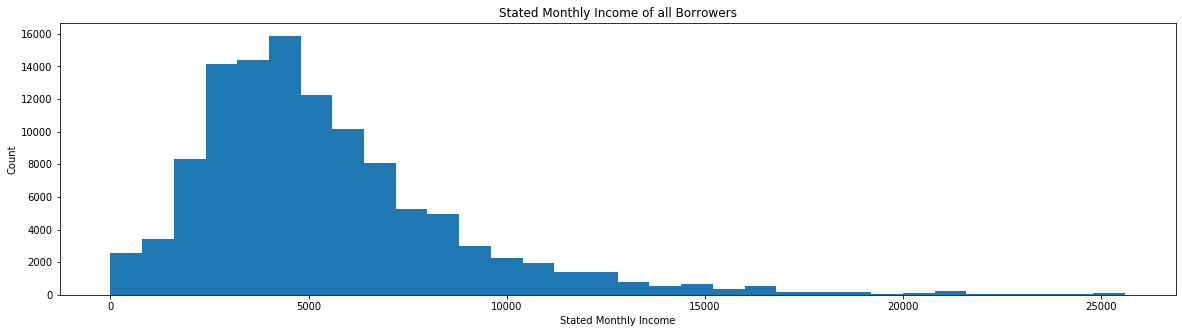

In [37]:
# Borrower Income Distribution
plt.figure(figsize = [20, 5]) 
working_df_sub = working_df[working_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, working_df_sub['StatedMonthlyIncome'].max()+1000, 800)
plt.hist(data = working_df, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count')
plt.title("Stated Monthly Income of all Borrowers");

We can easily say that StatedMonthlyIncome higher than 20 000 is made by mistake or wrong record. But it is not goal to clean this issue in this project therefore we will just cut out these values in future analysis as well.

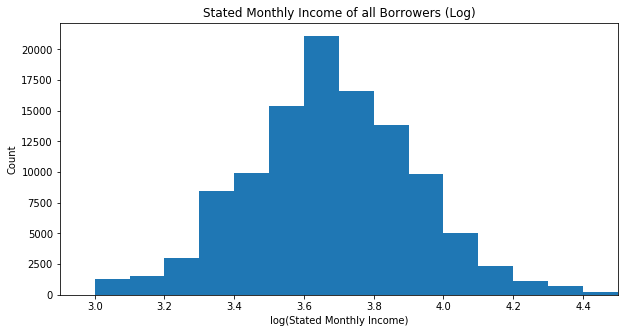

In [38]:
# Borrower Income Distribution / log
working_df_sub = working_df[working_df['StatedMonthlyIncome'] > 0] # exclude 0 values from log

log_data = np.log10(working_df_sub['StatedMonthlyIncome'])
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlim(2.9, 4.5) 
plt.xlabel('log(Stated Monthly Income)')
plt.ylabel('Count')
plt.title("Stated Monthly Income of all Borrowers (Log)");


Stated Monthly Income distribution is highly right skewed but after tranfromation x axis into log scale ins normaly distributed. Most common Monthly Income of borrower is approximately 4.800.

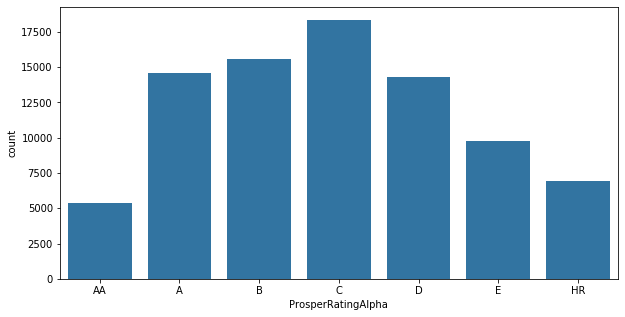

In [39]:
# Prosper Rating Distribution 
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
sns.countplot(data = working_df, x = 'ProsperRatingAlpha', color = base_color);

Distribution of the Prosper Rating is normal. Magority of borrowers were classified with "C" rating.
This is probably caused by fact that most people with super good credit are financially stable and do not usually take loans while people at the tail-end of the credit rating do not  offen get approved for loan.

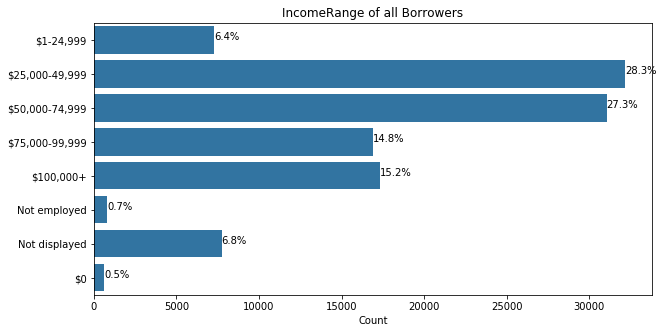

In [40]:
# Income Range of all borrower Rating Distribution 
ax = sns.countplot(y='IncomeRange', data=working_df, color = base_color)
plt.title("IncomeRange of all Borrowers")
plt.xlabel('Count')
plt.ylabel('')

base_color = sns.color_palette()[0]

total = len(working_df['IncomeRange'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show();

More than 50% of borrowers have income between 25.000 - 74.999 USD. More precisely in range of 25.000 - 49.999 USD is 28.3 % of all borrowers and in range 50.000 - 74.999 USD is 27.3% of all borrowers.

<a id='Univariate Exploration Summary'></a>
### Univariate Exploration Summary

* Global financial crises strongly affected loan bussines in 2009 <a href="#[1]">[1]</a> and in 2014 <a href="#[2]">[2]</a> as well.

* Top 5 "Loan Region" are California, Texas,  New York, Florida and Illinois.  California is a leader probably due to fact that Prosper Loan was founded and is located in California. <a href="#[3]">[3]</a>.

* Most commont Loan Amount are 4000 USD followed by 15000 and 10000 USD.

* Prosper Loan offer three termes for Loan. MOst common lenght is 36 month.

* Main reason for loan is Debt Consolodation. It looks a little bit strange to take money to pay previuos one but in case e.g. that "BorrowerRate" is lowwer that the previous one or borrower try to consolidate his/her debt is understandable.

* Borrower with occupation has regular income. They are beeter clkient regarding Prosper Loan risk.

* More than 50% of borrowers have income between 25.000 - 74.999 USD.

<a id='Bivariate Exploration'></a>
### Bivariate Exploration

#### Questions

Is there any strong correlation between numrical variables?

If answer to previous question is YES, how these values correlate?

Is there any relation between LoanOriginalAmount and some categorical variables?

In [41]:
numeric_var = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn',
               'ProsperScore', 'EmploymentStatusDuration', 'DebtToIncomeRatio',
               'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'PercentFunded',
               'Recommendations', 'Investors', 'CreditScoreRange']

categoric_vars = ['Term', 'ProsperRatingNumeric', 'LoanStatus', 'ProsperRatingAlpha', 'ListingCategory', 'BorrowerState',
                  'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange',  'LoanYear', ]

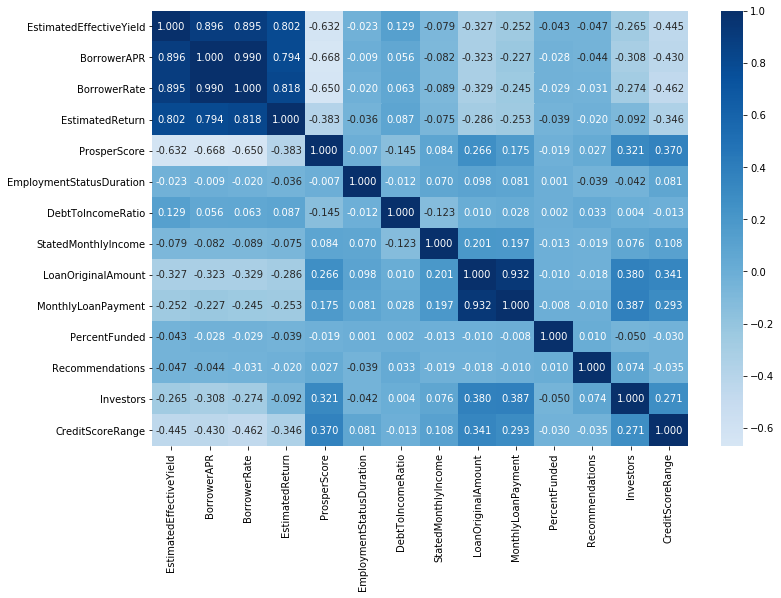

In [42]:
# Correlation between numerical variabl
plt.figure(figsize = [12, 8])

sns.heatmap(working_df[numeric_var].corr(), annot = True, fmt = '.3f', cmap = 'Blues', center = 0);

From heat map we ca see really strong correlation between

**EstimatedEffectiveYield and**
    
    BorrowerAPR 0.896
    BorrowerRate 0.895
    EstimatedReturn 0.802
    ProsperScore -0.632

**BorrowerAPR and**

    BorrowerRate 0.990
    EstimatedReturn 0.794
    ProsperScore -0.668
    
**BorrowerRate**

    EstimatedReturn 0.818
    ProsperScore -0.650

**MonthlyLoanPayment and**

    LoanOriginalAmount 0.932

EstimatedEffectiveYield and EstimatedReturn are similar values therefore some correlation with other variables is understandable.

Some is with BorrowerAPR and BorrowerRate.

Very interesting is realy strong correletion between MonthlyLoanPayment and OriginalLoanAmount. From the loan provider point of you is expected to agree with loan for borrower with suitable income.


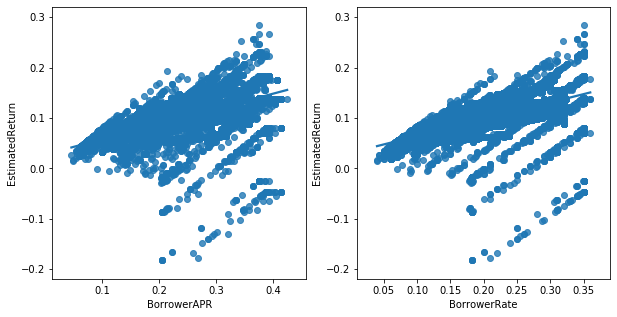

In [43]:
#BorrowerAPR / BorrowerRate vs. EstimatedReturn
plt.subplot(1, 2, 1)
sns.regplot(data = working_df, x = 'BorrowerAPR', y = 'EstimatedReturn');

plt.subplot(1, 2, 2)
sns.regplot(data = working_df, x = 'BorrowerRate', y = 'EstimatedReturn');


We can see possible many limear lines in the plot base on the some categorical value. We will investigate this findings in Multivariate Exploration part. 

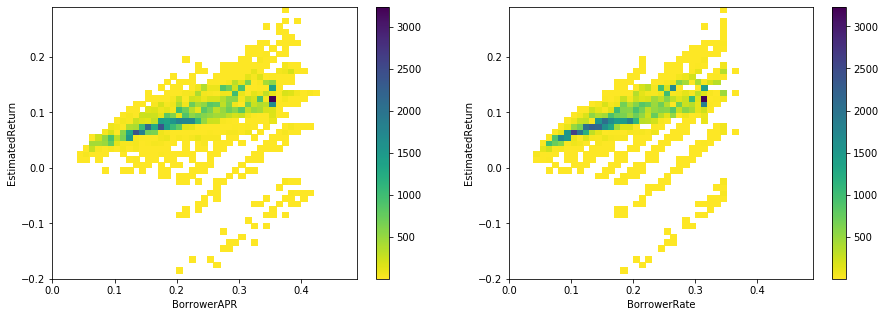

In [44]:
#BorrowerAPR / BorrowerRate #BorrowerAPR / BorrowerRate vs. EstimatedReturn
plt.figure(figsize = [15, 5 ])

plt.subplot(1, 2, 1)
bins_x = np.arange(0, 0.5, 0.01)
bins_y = np.arange(-0.2, 0.3, .01)

plt.xlabel('BorrowerAPR')
plt.ylabel('EstimatedReturn')

plt.hist2d(data = working_df, x = 'BorrowerAPR', y = 'EstimatedReturn',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()

plt.subplot(1, 2, 2)
bins_x = np.arange(0, 0.5, 0.01)
bins_y = np.arange(-0.2, 0.3, .01)

plt.xlabel('BorrowerRate')
plt.ylabel('EstimatedReturn')

plt.hist2d(data = working_df, x = 'BorrowerRate', y = 'EstimatedReturn',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();

As we expected from heatmap BorrwerAPR and BorrowerRate vs. EstimatedReturn is almost same.

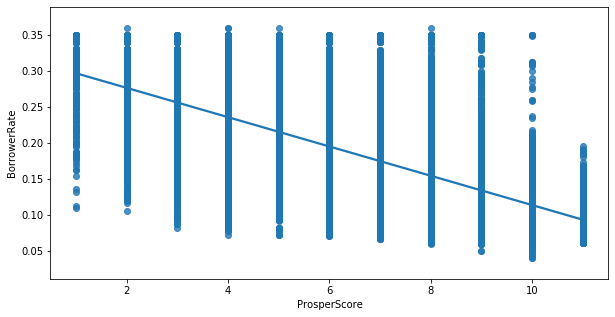

In [45]:
# BorrowerRate vs. ProsperScore

sns.regplot(data = working_df, x = 'ProsperScore', y = 'BorrowerRate');

Based on the definition we expected that ProsperScore is continuous variable from 0 to 10. But here we can see that ProsperScore is discrete variable. We can / have to use diffrent type of plot.

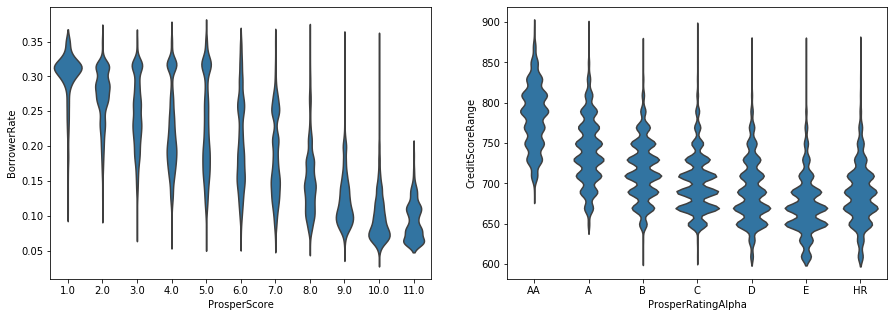

In [46]:
# ProsperScore vs. BorrowerRate and ProsperRatingAlpha vs. CreditScoreRange

base_color = sns.color_palette()[0]
plt.figure(figsize = [15, 5 ])

# left plot BorrowerRate vs. ProsperScore
plt.subplot(1, 2, 1)


sns.violinplot(data = working_df, x = 'ProsperScore', y = 'BorrowerRate', color = base_color,
              inner = None);

# Right plotCreditScoreRange vs. ProsperRatingAlpha
plt.subplot(1, 2, 2)
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.violinplot(data = working_df, x = 'ProsperRatingAlpha', y = 'CreditScoreRange', color = base_color,
               inner = None, order = order);

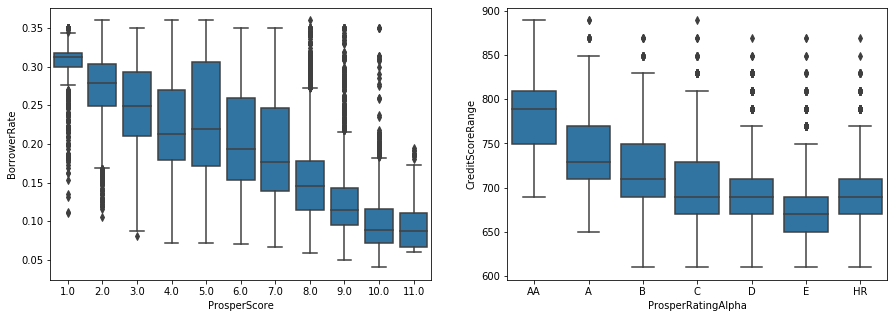

In [47]:
# ProsperScore vs. BorrowerRate and ProsperRatingAlpha vs. CreditScoreRange

plt.figure(figsize = [15, 5 ])

# left plot BorrowerRate vs. ProsperScore
plt.subplot(1, 2, 1)
sns.boxplot(data = working_df, x = 'ProsperScore', y = 'BorrowerRate', color = base_color);

# Right plotCreditScoreRange vs. ProsperRatingAlpha
plt.subplot(1, 2, 2)
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.boxplot(data = working_df, x = 'ProsperRatingAlpha', y = 'CreditScoreRange', color = base_color,order = order);

We can see that borrowers with higher ProsperScore has lower borrower rate. Outlierscould be due to other factors such as amount of loan taken, new monthly income or employment status or some others.

Same pattern is visible with CreditScoreRange vs. ProsperRatingAlpha. For rating AA we can see higher CreditScoreRandge than for HR rating.


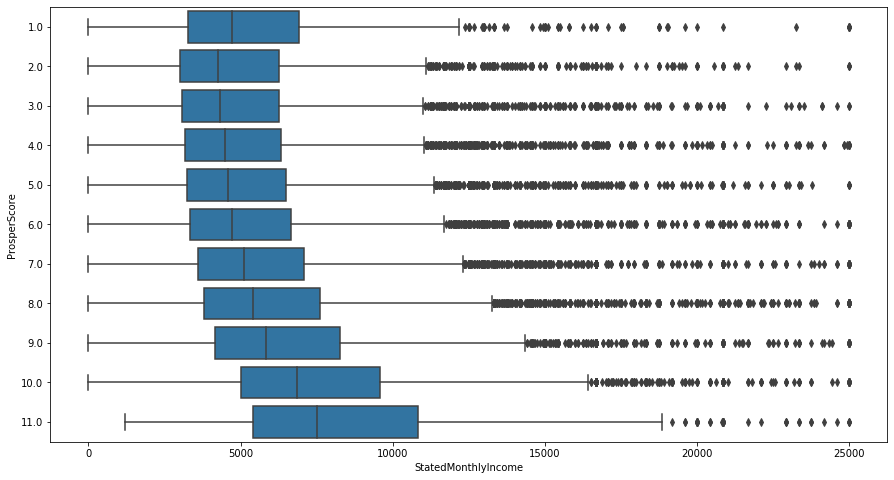

In [48]:
# ProsperScore vs. StatedMonthlyIncome upto 25 000 USD income
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
working_df_sub = working_df[working_df['StatedMonthlyIncome'] <= 25000]

sns.boxplot(data = working_df_sub, x = 'StatedMonthlyIncome', y = 'ProsperScore', color = base_color, orient = 'h');

StatedMonthlyIncome influences ProsperScore f borrower in positive way. Higher income causes higher ProsperScore.


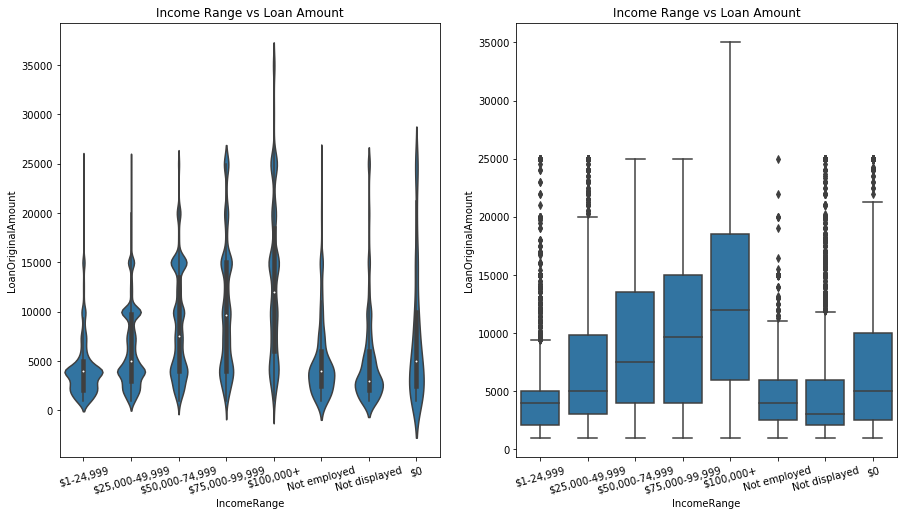

In [49]:
# Income Range vs Loan Amount
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = working_df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15)
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = working_df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15)
plt.title('Income Range vs Loan Amount');



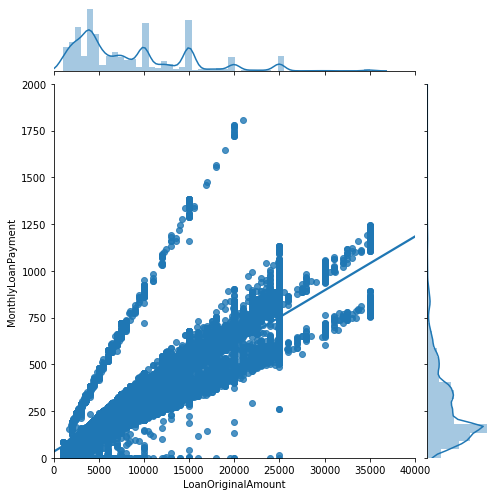

In [50]:
# MonthlyLoanPayment vs. LoanOriginalAmount
g = sns.jointplot('LoanOriginalAmount', 'MonthlyLoanPayment', data=working_df,
                  kind="reg", truncate=False,
                  xlim=(0, 40000), ylim=(0, 2000),
                  color=base_color, height=7);

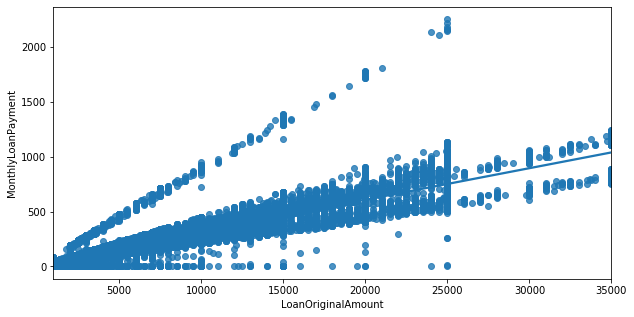

In [51]:
# LoanOriginalAmount vs. MonthlyLoanPayment
sns.regplot(data = working_df, y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount');

Corelation between MonthlyLoanPayment and LoanOriginalAmount looks like we ave there three separate corellation based on Term of Loan. We will exlore this fact in part for Multivariate Exploration.

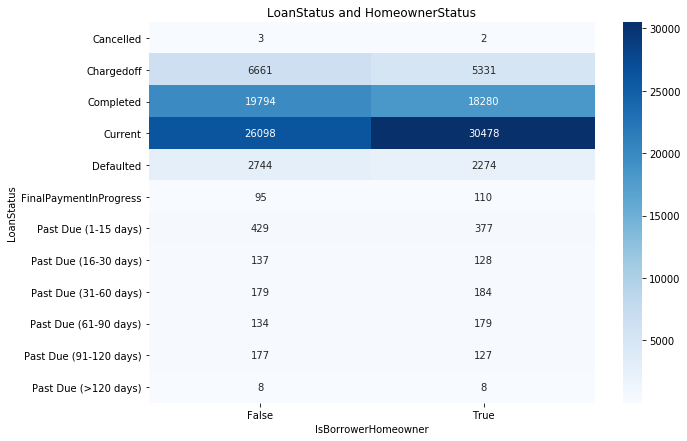

In [52]:
# LoanStatus vs. HomeOwnersStatus
plt.figure(figsize = [10, 7])

ct_counts = working_df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues')

plt.title('LoanStatus and HomeownerStatus');

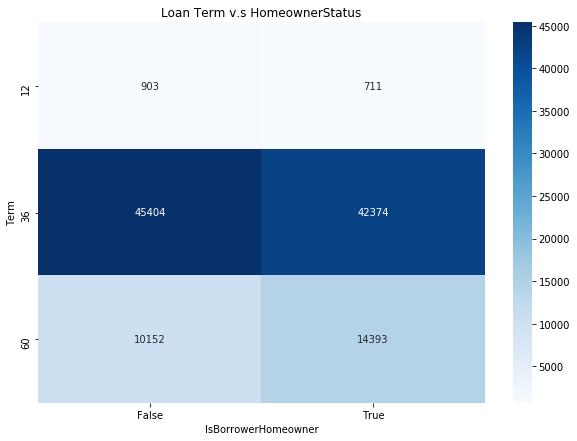

In [53]:
# Loan Term vs. HomeOwnersStatus
plt.figure(figsize = [10, 7])

ct_counts = working_df.groupby(['IsBorrowerHomeowner', 'Term']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Term', columns = 'IsBorrowerHomeowner', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues')

plt.title('Loan Term v.s HomeownerStatus');

We can see that ownership of house is not a factor for loan and it was not in the past neither.


<a id='Bivariate Exploration Summary'></a>
### Bivariate Exploration Summary

* StatedMonthlyIncome influences ProsperScore for borrowers in positive way. Higher income causes higher ProsperScore and easier loan approval proccess.

* Borrowers with higher ProsperScore has lower borrower rate. Outlierscould be due to other factors such as amount of loan taken, new monthly income or employment status or some others.

* Same pattern is visible with CreditScoreRange vs. ProsperRatingAlpha. For rating AA we can see higher CreditScoreRandge than for HR rating.

* Strong correletion between MonthlyLoanPayment and OriginalLoanAmount. From the loan provider point of you is expected to agree with loan for borrower with suitable income.

* Ownership of house is not a factor for loan and it was not in the past neither.

<a id='Multivariate Exploration'></a>
### Multivariate Exploration

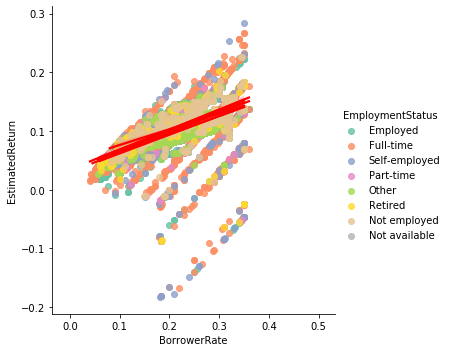

In [54]:
#BorrowerAPR / BorrowerRate vs. EstimatedReturn basd on EmploymentStatus

g = sns.lmplot(x="BorrowerRate", y="EstimatedReturn", hue="EmploymentStatus", data=working_df, line_kws={'color': 'red'},
               palette="Set2")

# Use more informative axis labels than are provided by default
g.set_axis_labels("BorrowerRate", "EstimatedReturn");

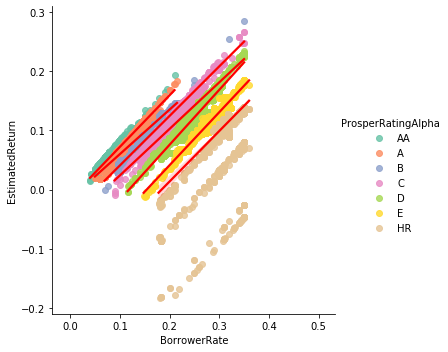

In [55]:
#BorrowerAPR / BorrowerRate vs. EstimatedReturn basd on ProsperRatingAplha

g = sns.lmplot(x="BorrowerRate", y="EstimatedReturn", hue="ProsperRatingAlpha", data=working_df, line_kws={'color': 'red'},
               palette="Set2")

# Use more informative axis labels than are provided by default
g.set_axis_labels("BorrowerRate", "EstimatedReturn");


In Bivariate Exploration part we recognized some patern in relationship between  BorrowerRate vs. EstimatedReturn. We expected there is some categorical variables which has some impact on this relationship.

From plot above we can see that the ProsperRatingAplha has direct impact on relation between BorrowerRate and EstimatedReturn.

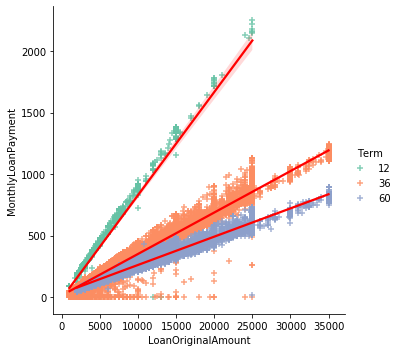

In [56]:
## LoanOriginalAmount vs. MonthlyLoanPayment by Term

g = sns.lmplot(x="LoanOriginalAmount", y="MonthlyLoanPayment", hue="Term", data=working_df, line_kws={'color': 'red'},
              markers=["+", "+", '+'], palette="Set2")

# Use more informative axis labels than are provided by default
g.set_axis_labels("LoanOriginalAmount", "MonthlyLoanPayment");

In Bivariate exploration we reccognized that probably there is some relationship between LoanOriginalAmount and MonthlyLoanPayment based on Term of Loan. This shows that LoanOriginalAmount and MonthlyLoanPayment has very good linear relationship for each Term.

Higher MothlyLoanPayment is expectable in case of high LoanOriginalAmount and short Term for paying whole Loan.


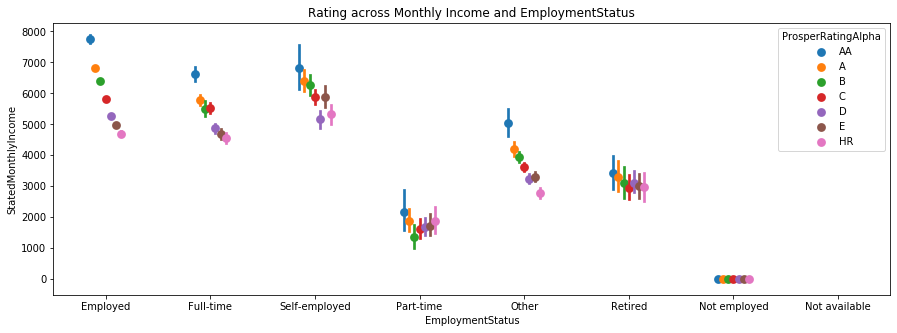

In [57]:
# Rating across Monthly Income and EmploymentStatus

working_df_sub = working_df[working_df['StatedMonthlyIncome'] <= 25000]


plt.figure(figsize = [15, 5])


ax = sns.pointplot(data = working_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRatingAlpha',
                  dodge = 0.3, linestyles = "")
plt.title('Rating across Monthly Income and EmploymentStatus');

In every EmploymentStatus category s clearly visible that Prosperrating is incresing with incresing StatedMonthlyIncome. 


In [58]:
working_df_sub = working_df[working_df['StatedMonthlyIncome'] <= 25000]

#df_raw[col] = df_raw[col].astype('category')
working_df_sub['IncomeRange'] = working_df_sub['IncomeRange'].cat.remove_categories(['Not employed','$0', 'Not displayed'])

working_df_sub.groupby(['IncomeRange']).count()

C:\Utils\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,...,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors,CreditScoreRange,LoanQuarter,LoanYear
IncomeRange,,,,,,,,,,,,,,,,,,,,,
"$1-24,999",7274,7274,4654,7274,7274,4654,4654,4654,4654,7274,...,7274,7274,7274,7274,7274,7274,7274,7274,7274,7274
"$25,000-49,999",32192,32192,24175,32192,32192,24175,24175,24175,24175,32192,...,32192,32192,32192,32192,32192,32192,32192,32192,32192,32192
"$50,000-74,999",31049,31049,25627,31049,31049,25627,25627,25627,25627,31049,...,31049,31049,31049,31049,31049,31049,31049,31049,31049,31049
"$75,000-99,999",16915,16915,14498,16915,16915,14498,14498,14498,14498,16915,...,16915,16915,16915,16915,16915,16915,16915,16915,16915,16915
"$100,000+",16843,16843,14791,16843,16843,14791,14791,14791,14791,16843,...,16843,16843,16843,16843,16843,16843,16843,16843,16843,16843


C:\Utils\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


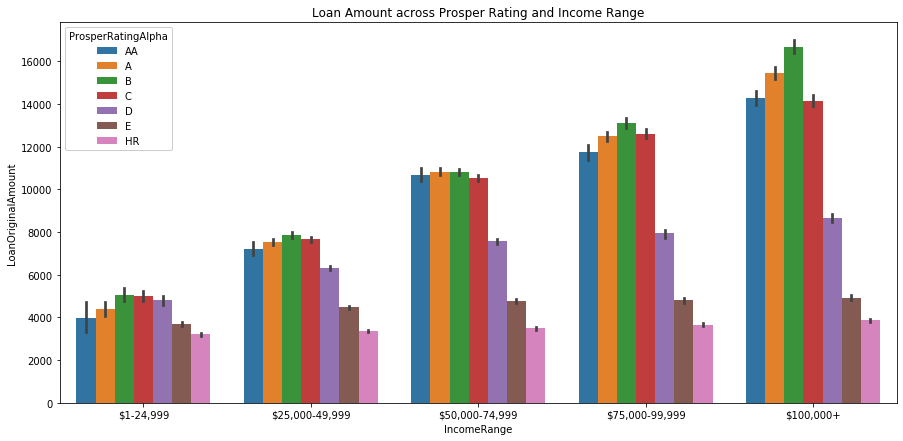

In [59]:

working_df_sub = working_df[working_df['StatedMonthlyIncome'] <= 25000]

working_df_sub['IncomeRange'] = working_df_sub['IncomeRange'].cat.remove_categories(['Not employed','$0', 'Not displayed'])

plt.figure(figsize = [15, 7])

ax = sns.barplot(data = working_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRatingAlpha')
ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'ProsperRatingAlpha')
plt.title('Loan Amount across Prosper Rating and Income Range');

LoanOriginalAmout dependes on IncomeRange. If we have higher IncomeRange for the Prosper Loan is an indicator that we will be able to fullfil our commitmet. If we look closer to each IncomeRange we can regognazed let's call it "safety policy" from Prospred Loan that client with rating "E" or "HR" are not allowed to have o loan higgher than 5 000 USD even in case of higher IncomeRange.


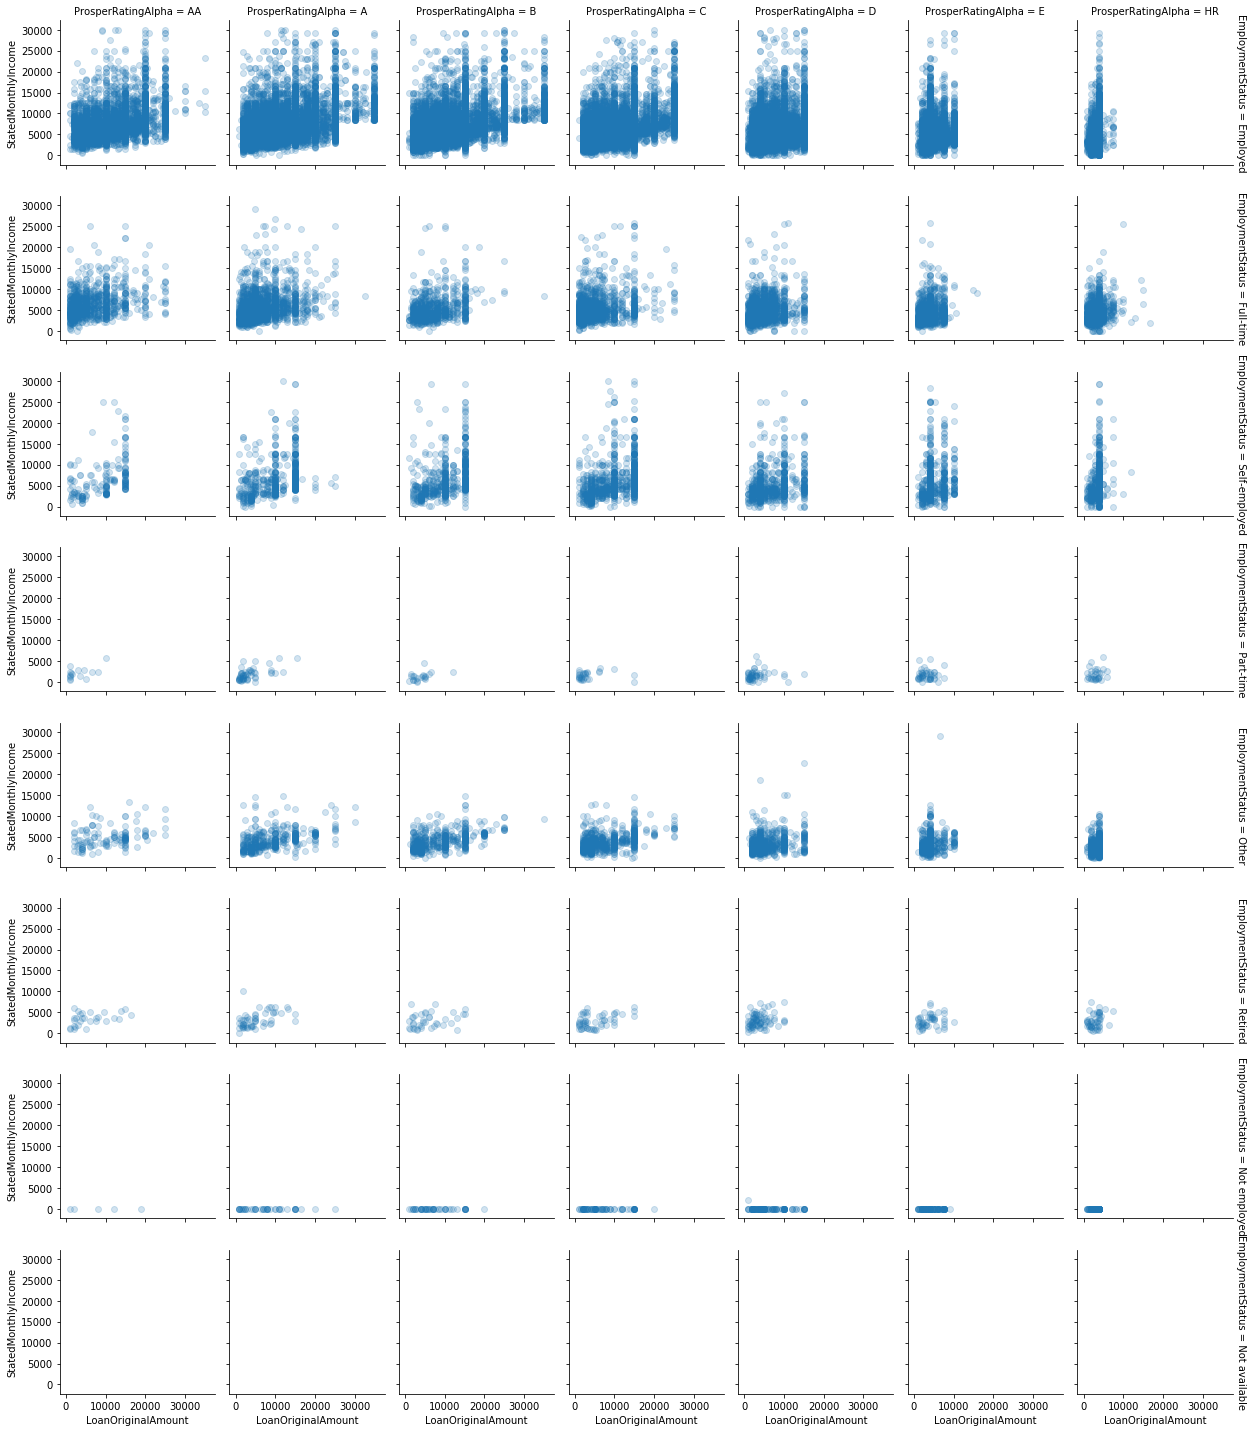

In [60]:
working_df_sub = working_df[working_df['StatedMonthlyIncome'] <= 30000]

graph = sns.FacetGrid(data = working_df_sub, col = 'ProsperRatingAlpha', row = 'EmploymentStatus',
                      height = 2.5, margin_titles = True)
graph.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome',alpha = 1/5);

Best candidates for loan from Prosper Loan are those who are employed and have rating AA to C. These clients took loan aprox. up 20 000 USD. Ratings A and B even higher. Again interesting fact is that clients with StatedMonthlyIncome higher than 15 000 asked for a loan as well.

Due to fast that Prosper Loan wanted to have loaned money back we can see from comparison above that clients with EmploymentStatus as "Self employed" and "Part time" are not allowed to take loan higher than 20 000 USD. Second fact is that "Self employed" are allowed to have a loan more offen than "Part time" clients.

CLients with EmploymentStatus as "Not employed" or "NOt available" are to risky for a loan. 

<a id='Multivariate Exploration Summary'></a>
### Multivariate Exploration Summary

* ProsperRatingAplha has direct impact on relation between BorrowerRate and EstimatedReturn.

* Higher MothlyLoanPayment allowes higher LoanOriginalAmount and short Term for paying whole Loan.

* LoanOriginalAmout dependes on IncomeRange. 

* Higher IncomeRange is an indicator that client is able to fullfil loan commitmet.

* Cient with rating "E" or "HR" are not allowed to have o loan higgher than 5 000 USD even in case of higher IncomeRange.

* Best candidates for loan are those who are employed and have rating AA to C.

* In every EmploymentStatus category s clearly visible that Prosperrating is incresing with incresing StatedMonthlyIncome. 

* LoanOriginalAmount and MonthlyLoanPayment has very good linear relationship for each Term.

* Clients with EmploymentStatus as "Self employed" and "Part time" are not allowed to take loan higher than 20 000 USD.

* "Self employed" are allowed to have a loan more offen than "Part time" clients.

* CLients with EmploymentStatus as "Not employed" or "Not available" are too risky for a loan. 
 

<a id='Resources'></a>
## Resources

<a id="[1]">[1]</a> <a href="https://en.wikipedia.org/wiki/Global_financial_crisis_in_2009">Global financial crisis in 2009</a>

<a id="[2]">[2]</a> <a href="https://www.oecd.org/economy/growth/the-effect-of-the-global-financial-crisis-on-oecd-potential-output-oecd-journal-economic-studies-2014.pdf">The effect of the global financial crisis
on OECD potential output</a>

<a id="[3]">[3]</a> <a href="https://www.prosper.com/plp/about/contact-us/">Prosper Funding LLC</a>

